# CITS5508: Assignment 3
### 23170781 - Colin Melville

## Section 1: A Model for Diagnosing Cancer
### https://github.com/julietgrantham/CITS5508/blob/main/Assignment%203/assignment3.ipynb

#### Dataset Inspection:
Let's see what it looks like visually, then check if there are any missing values. Also check the basic data on it like shape and distribution of values.

In [1]:
import pandas as pd

# Load the dataset
breast_cancer_df = pd.read_csv('breast-cancer.csv')
breast_cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [2]:
def check_missing_values(df):
    if df.isnull().values.any():
        print("DataFrame contains missing values.")
    else:
        print("DataFrame does not contain missing values.")

check_missing_values(breast_cancer_df)

print("Dataset shape:", breast_cancer_df.shape)

DataFrame does not contain missing values.
Dataset shape: (569, 12)


The dataframe has 569 entries and has 12 columns. It does, however, contain non-numerical values: the column 'diagnosis'. Therefore we encode these non-numerical data values as numerical values. Also, the column 'id' is irrelevant. As the diagnosis is what we are trying to predict, it is put at the last column.

In [3]:
# Numericalize column
breast_cancer_df['diagnosis'] = breast_cancer_df['diagnosis'].replace({'M': 1, 'B': 0})
# While here, let's check the balance of diagnosis, where M = malignant, B = benign.
print("Diagonsis balance, where 0 = Malignant, 1 = Benign:\n", breast_cancer_df["diagnosis"].value_counts())

# Drop irrelevant 'id' column
breast_cancer_df = breast_cancer_df.drop('id', axis=1)

#Move diagnosis to the back
cols = list(breast_cancer_df.columns)
cols.remove('diagnosis')
cols.append('diagnosis')
breast_cancer_df = breast_cancer_df[cols]

breast_cancer_df

Diagonsis balance, where 0 = Malignant, 1 = Benign:
 diagnosis
0    357
1    212
Name: count, dtype: int64


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,1
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,1


### What does this tell us?

Referring to the balance, we can see that there is about 150% more benign tumors than malignant. This is indicative of a n unbalanced dataset. There are various techniques we can use to balance out this data for training and testing, such as resampling. But since we're still inspecting the dataset we'll do this later. However we should keep in mind that because the classes are imbalanced, accuracy is not a suitable metric, as if our model randomly outputted a value at 50/50 chance, it would have about 62%. Instead we will use precision and recall.

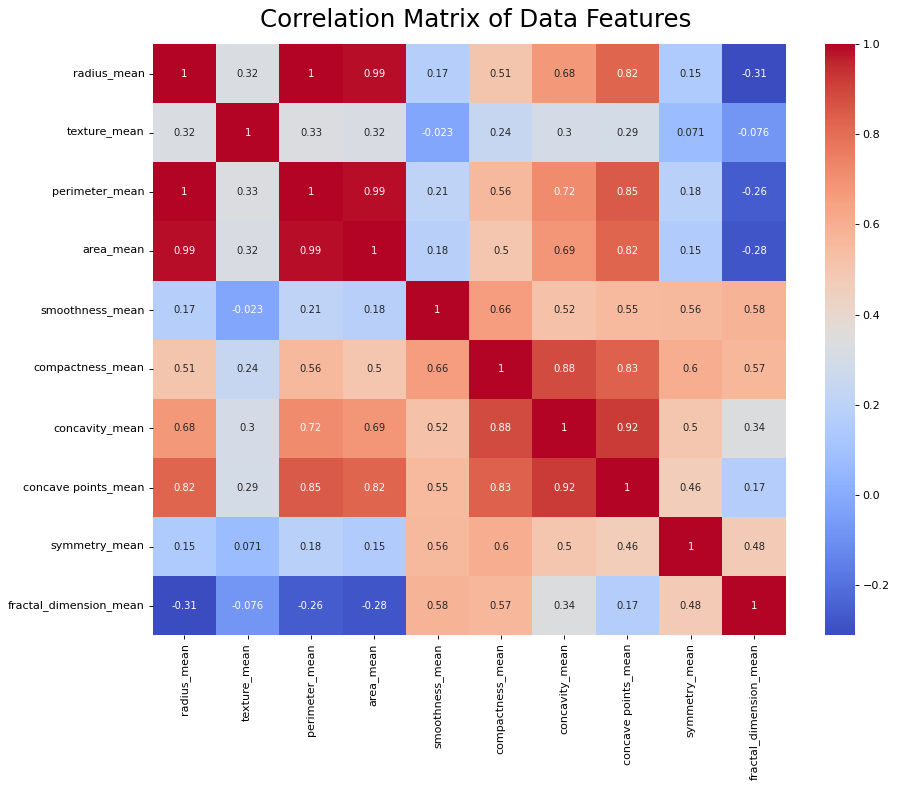

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

def show_correlation_matrix(data):
    """
    Displays a correlation matrix heatmap for the given dataset.
    
    Args:
        data (pandas.DataFrame): The input dataset, where each column represents a feature and each row represents an observation.
        
    Returns:
        None
    """
    # Compute the correlation matrix using the pandas `corr()` method
    corr_matrix = data.corr()
    
    # Set the figure size and resolution
    fig, ax = plt.subplots(figsize=(12,10), dpi=80)
    
    # Use seaborn to plot a heatmap of the correlation matrix
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax, annot_kws={"fontsize": 9})
    fig.suptitle("Correlation Matrix of Data Features", fontsize=22)
    # Adjust the layout of the plot to prevent overlap
    plt.tight_layout()

show_correlation_matrix(breast_cancer_df.iloc[:,:-1])

### What do we think of this plot?

We see that there are some very very highly correlated features, namely `radius_mean` with `area_mean`, with `perimeter_mean`, and `concativity_mean` with concave `points_mean`. The highly correlated features should be removed, as their inclusion might mean that there is redundant information. For instance, `perimeter_mean` and `area_mean` are closely correlated and their values closely match with all other correlation pairs. Including both of these features means that there is unnecessary complexity and higher dimensionality, while not significantly improving the model.

Another reason is that it can become difficult to interpret what effect the features may have. This is called 'multicollinearity', and can lead to unstable and unreliable model estimates. The removal of these highly correlated features will mitigate multicollinearity, improve model stability, and make the model more efficient. Furthermore, later we are using logistic regression, which assumes that the features are independent of another, which means that we *should* remove these offending features anyway. Also, these features generally serve little purpose other than to add noise in the training section, leading to overfitting and poor generalization on new data. 

#### Therefore, we will drop the features with over 0.9 correlation.

In [5]:
def drop_highly_correlated_features(data, threshold=0.9):
    # Compute the correlation matrix using the pandas `corr()` method
    corr_matrix = data.corr()
    
    # Find the highly correlated pairs of features
    pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                pair = (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
                pairs.append(pair)
    
    # Sort the pairs by the absolute value of the correlation coefficient
    pairs.sort(key=lambda x: abs(x[2]), reverse=True)
    
    # Drop the most highly correlated features from the input dataset
    for pair in pairs:
        if pair[0] in data.columns and pair[1] in data.columns:
            abs_corr_0 = max(abs(corr_matrix.loc[pair[0], :]))
            abs_corr_1 = max(abs(corr_matrix.loc[pair[1], :]))
            if abs_corr_0 > abs_corr_1:
                data = data.drop(pair[0], axis=1)
            else:
                data = data.drop(pair[1], axis=1)
    
    # Return the resulting cleaned dataset
    return pairs, data

pairs, clean_df = drop_highly_correlated_features(breast_cancer_df)

print("Feature pairings with correlation >0.9:")
pairs

Feature pairings with correlation >0.9:


[('perimeter_mean', 'radius_mean', 0.9978552814938109),
 ('area_mean', 'radius_mean', 0.9873571700566127),
 ('area_mean', 'perimeter_mean', 0.9865068039913907),
 ('concave points_mean', 'concavity_mean', 0.9213910263788588)]

We can see that the above pairings have correlations above 0.9. This means that out of every pair one of them will remain. As `area_mean`, `radius_mean`, `perimeter_mean` all are extremely highly correlated, only one of them, in this case `area_mean` remains. You can verify their correlations in the correlation matrix above. Also out of the last pairing, `concave points_mean` remains. Here is the cleaned dataframe:

In [6]:
clean_df

,texture_mean,area_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,10.38,1001.0,0.11840,0.27760,0.14710,0.2419,0.07871,1
1,17.77,1326.0,0.08474,0.07864,0.07017,0.1812,0.05667,1
2,21.25,1203.0,0.10960,0.15990,0.12790,0.2069,0.05999,1
3,20.38,386.1,0.14250,0.28390,0.10520,0.2597,0.09744,1
4,14.34,1297.0,0.10030,0.13280,0.10430,0.1809,0.05883,1
...,...,...,...,...,...,...,...,...
564,22.39,1479.0,0.11100,0.11590,0.13890,0.1726,0.05623,1
565,28.25,1261.0,0.09780,0.10340,0.09791,0.1752,0.05533,1
566,28.08,858.1,0.08455,0.10230,0.05302,0.1590,0.05648,1
567,29.33,1265.0,0.11780,0.27700,0.15200,0.2397,0.07016,1


Let's use pairplot to check the feature spaces:

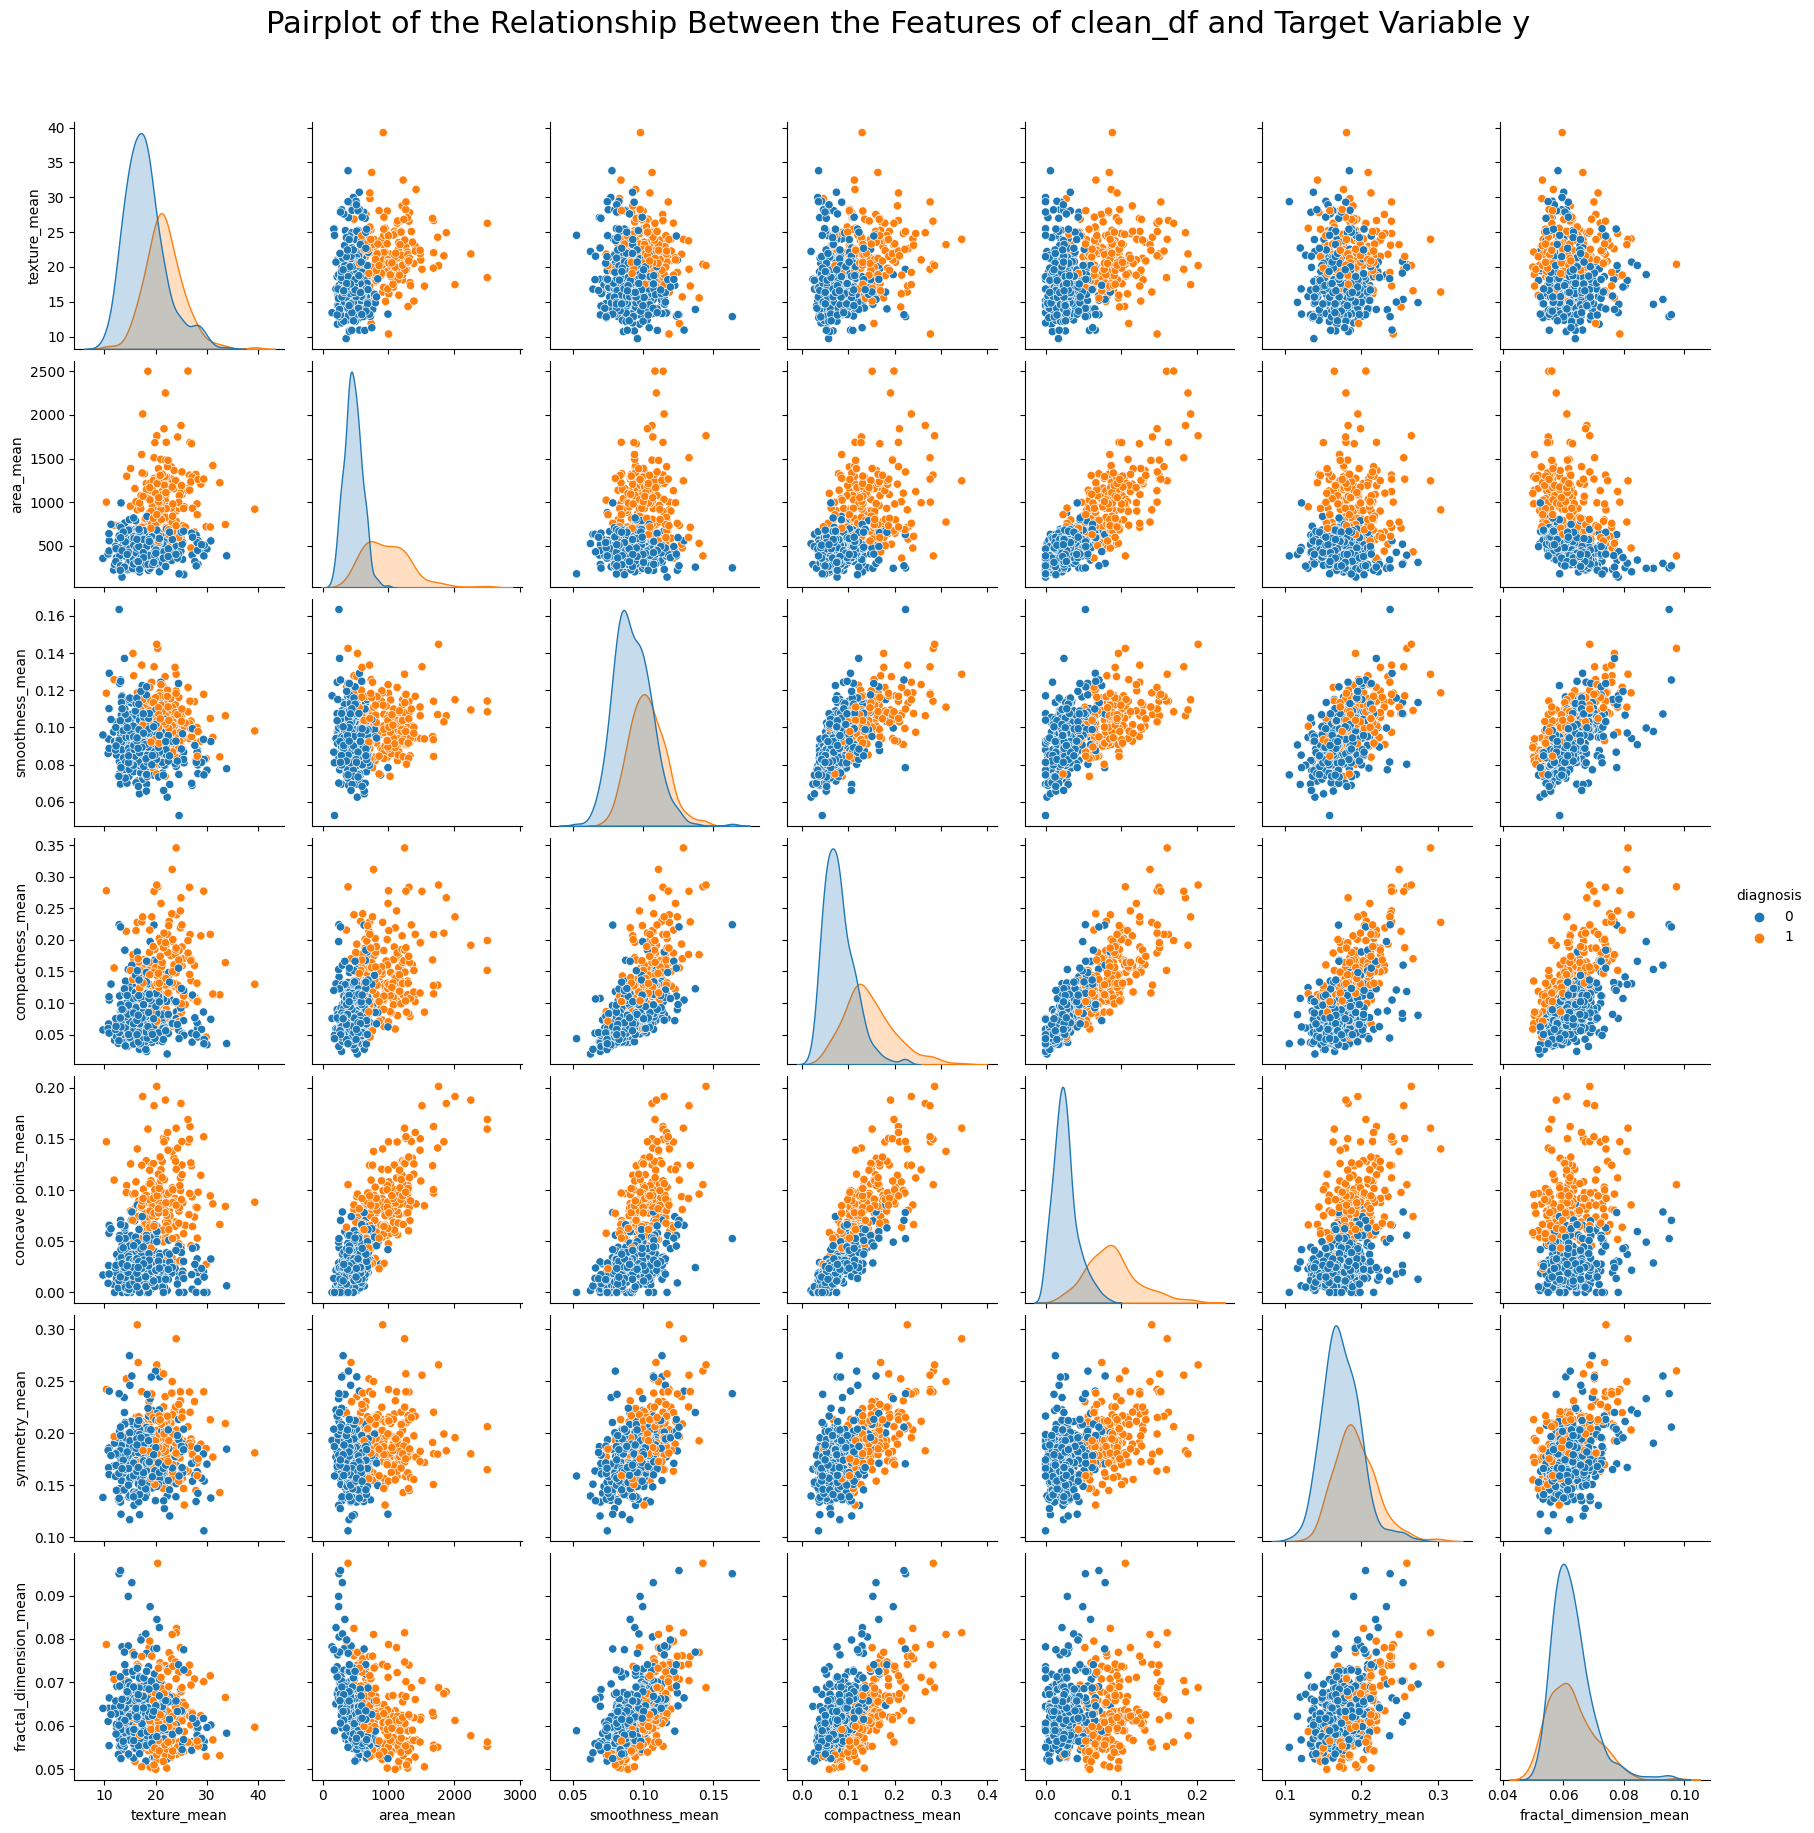

In [7]:
plot = sns.pairplot(clean_df, hue='diagnosis')
plot.fig.suptitle("Pairplot of the Relationship Between the Features of clean_df and Target Variable y", 
                  fontsize=22, y=1.05)
plt.show()

From the above pairplot graph we can see that the feature spaces are relatively separated. Of course there are cases like `fractal_dimension_mean` and `symmetry_mean` which are interspersed, same case with `texture_mean` and `fractal_dimension_mean`. Also looking at the diagonal distributions it looks as if scaling will be needed.

Let's investigate further with histograms:

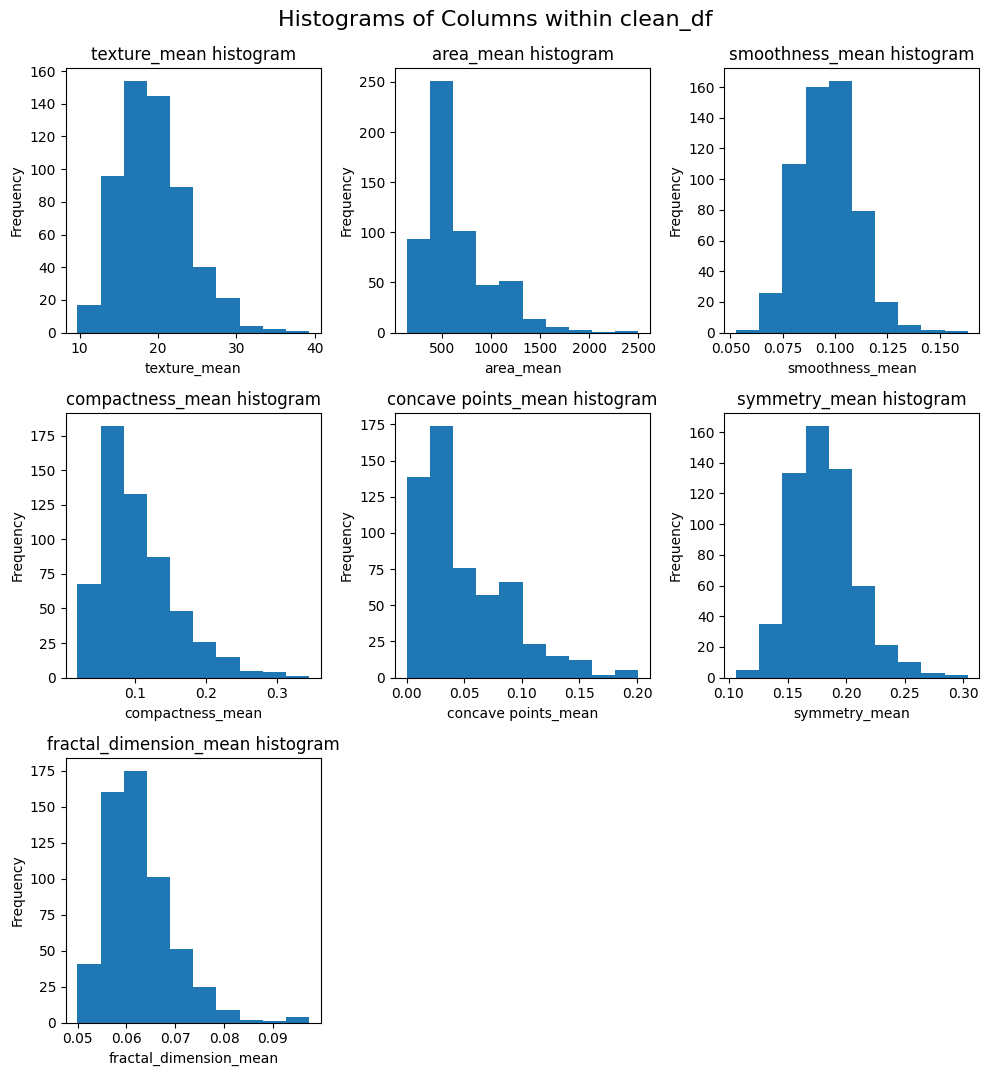

In [55]:
import matplotlib.pyplot as plt
import math

def plot_histograms(data):
    """
    Plots histograms for each column in the given dataset in a subplot figure.
    
    Args:
        data (pandas.DataFrame): The input dataset.
        
    Returns:
        None
    """
    num_columns = len(data.columns)
    num_rows = math.ceil(num_columns / 3)  # Assuming 3 columns per row in the subplot figure
    fig, axes = plt.subplots(num_rows, 3, figsize=(10, 3.5 * num_rows))  # Adjust the figure size as needed
    
    for i, column in enumerate(data.columns):
        row = i // 3
        col = i % 3
        ax = axes[row, col]
        
        ax.hist(data[column])
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        ax.set_title(f'{column} histogram')
    
    # Remove empty subplots if the number of columns is not a multiple of 3
    if num_columns % 3 != 0:
        empty_subplots = 3 - (num_columns % 3)
        for i in range(empty_subplots):
            fig.delaxes(axes[num_rows-1, num_columns % 3 + i])
    
    plt.tight_layout()
    plt.suptitle("Histograms of Columns within clean_df", y=1.02, fontsize=16)
    plt.show()

plot_histograms(clean_df.iloc[:,:-1])

Clearly a lot of the features are right-skewed. Notable examples are `fractal_dimension_mean`, `compactness_mean`, `concave points_mean`, `texture_mean`, and `area_mean`. 5 out of the inspected 7 features. `concave_points_mean` also appears to be bimodal, indicating 2 modes. `symmetry_mean` and `smoothness_mean` are both well-balanced models. Interestingly, `area_mean` appears to be highly concentrated in one spot in particular.

Now let's move onto `train_test_split` and start on the model.

## Task 1.1: Predicting Tumor Status with Logistic Regression and a Decision Tree Model
Build a logistic regression and a decision tree model to predict the tumour status. The presentation should include a comparison of the two models and a recommendation regarding which would be more appropriate in a clinical setting. Note: You should use the fundamental steps of a machine learning project (e.g. hyperparameters fine-tuning, cross-validation, etc.).

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = clean_df.drop(['diagnosis'], axis=1)
y = clean_df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using standardscaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Thoughts on our Model to-be:

In the context of our task, which involves using cell features to determine if a tumor is benign or malignant, it is important to carefully consider the scoring strategy when performing grid search for hyperparameter tuning. Since the dataset is imbalanced, where the number of malignant cases is relatively small compared to benign cases, using the "accuracy" scoring alone may not be representative of the model's performance.

In this scenario, other scoring strategies such as precision, recall, F1 score, or ROC AUC may be more relevant for binary classification. Precision measures the proportion of correctly predicted malignant tumors out of all predicted malignant cases, focusing on reducing false positives. This is important as false positives can lead to unnecessary medical procedures for patients with benign tumors. Recall measures the proportion of correctly predicted malignant tumors out of all actual malignant cases, aiming to minimize false negatives. False negatives can have serious consequences, as patients with malignant tumors may go undetected without timely medical intervention.

Considering the clinical setting, where additional biopsy tests are typically performed for identified malignant tumors, it is crucial to have a high recall during the initial screening. Therefore, using recall as the scoring metric for grid search allows us to prioritize the model's ability to correctly identify malignant cases and minimize false negatives.

By selecting an appropriate scoring strategy that aligns with the specific requirements and consequences of the task, we can optimize the model's performance in a way that is more meaningful and relevant in the context of diagnosing tumors as benign or malignant.

First off let's begin with our logistic regression model. We'll find the best params using GridSearch with CV=5, with our accuracy set to recall.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, precision_score
import numpy as np

def find_best_logistic_regression(X, y):
    # Define the logistic regression model
    logreg = LogisticRegression(max_iter=10000, random_state=42)

    # Define the parameter grid for hyperparameter tuning
    param_grid = [
        {
            'solver': ['newton-cg', 'lbfgs', 'sag'],
            'penalty': ['l2'],
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        },
        {
            'solver': ['liblinear', 'saga'],
            'penalty': ['l1', 'l2'],
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        },
        {
            'solver': ['saga'],
            'penalty': ['elasticnet'],
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
        }
    ]

    # Define the scoring metric as a combination of precision and recall
    scoring = {'Precision': make_scorer(precision_score, zero_division=0), 'Recall': 'recall'}

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring=scoring, refit='Recall', cv=5)
    grid_search.fit(X, y)

    # Print the best hyperparameters and corresponding scores
    print("Best Hyperparameters: ", grid_search.best_params_)
    print("Best Recall Score: ", grid_search.best_score_)
    print("Best Precision Score: ", grid_search.cv_results_['mean_test_Precision'][grid_search.best_index_])

    # Return the best trained model
    best_model = grid_search.best_estimator_
    return best_model

# Usage
logreg = find_best_logistic_regression(X_train, y_train)

y_pred = logreg.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Compute the classification report with handling undefined precision scores
report = classification_report(y_test, y_pred, zero_division=0, labels=np.unique(y_pred))
print("Classification Report:")
print(report)


Best Hyperparameters:  {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Recall Score:  0.905169340463458
Best Precision Score:  0.9294745263696876
Confusion Matrix:
[[67  4]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



And now we train the decision tree too!

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, make_scorer

def find_best_decision_tree(X, y):
    # Define the decision tree classifier
    dt_classifier = DecisionTreeClassifier(random_state=42)

    # Define the parameter grid for hyperparameter tuning
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    }

    # Define the scoring metric as a combination of precision and recall
    scoring = {'Precision': 'precision', 'Recall': 'recall'}

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, scoring=scoring, refit='Recall', cv=5)
    grid_search.fit(X, y)

    # Print the best hyperparameters and corresponding scores
    print("Best Hyperparameters: ", grid_search.best_params_)
    print("Best Recall Score: ", grid_search.best_score_)
    print("Best Precision Score: ", grid_search.cv_results_['mean_test_Precision'][grid_search.best_index_])

    # Get the best trained model
    best_model = grid_search.best_estimator_

    # Make predictions
    y_pred = best_model.predict(X)

    # Print the confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y, y_pred))

    # Print the classification report
    print("Classification Report:")
    print(classification_report(y, y_pred))

    return best_model

# Usage
dctree = find_best_decision_tree(X_train, y_train)


Best Hyperparameters:  {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
Best Recall Score:  0.9229946524064172
Best Precision Score:  0.9266043499511241
Confusion Matrix:
[[286   0]
 [ 15 154]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       286
           1       1.00      0.91      0.95       169

    accuracy                           0.97       455
   macro avg       0.98      0.96      0.96       455
weighted avg       0.97      0.97      0.97       455



### What do we think?

In a clinical setting, both precision and recall are important evaluation metrics. Precision measures the proportion of correctly predicted positive samples (tumors) out of all samples predicted as positive. Recall measures the proportion of correctly predicted positive samples out of all actual positive samples.

**Logistic Regression:**

- Precision: 0.91 (class 1) and 0.96 (class 0)
- Recall: 0.93 (class 1) and 0.94 (class 0)
- The model achieves high precision and recall scores for both classes, indicating that it performs well in identifying tumors (class 1) and non-tumors (class 0).
- The confusion matrix shows that there are 3 false negatives (actual tumors predicted as non-tumors) and 4 false positives (actual non-tumors predicted as tumors). The overall performance of the model is quite good with an accuracy of 94%.


**Decision Tree Classifier:**

- Precision: 1.00 (class 1) and 0.95 (class 0)
- Recall: 0.91 (class 1) and 1.00 (class 0)
- The model achieves high precision and recall scores as well.
- The confusion matrix shows that there are 15 false negatives and no false positives.
- The accuracy of the decision tree classifier is higher at 97%.

**Talking about the metrics themselves:**
- Accuracy: Both models achieve high accuracy, with the logistic regression model achieving an accuracy of 0.94 and the decision tree classifier achieving an accuracy of 0.97. While accuracy is important, it should not be the sole criteria for evaluating a model's performance, especially when dealing with imbalanced datasets.

- Precision: Precision measures the proportion of correctly predicted positive cases (tumors) out of all predicted positive cases. The logistic regression model has a precision of 0.91 for class 1 (tumors), while the decision tree classifier has a precision of 1.00 for class 1. A higher precision indicates that the model has a lower rate of false positives, which is crucial in a clinical setting to minimize unnecessary interventions or treatments.

- Recall: Recall (also known as sensitivity or true positive rate) measures the proportion of correctly predicted positive cases out of all actual positive cases. The logistic regression model achieves a recall of 0.93 for class 1, while the decision tree classifier achieves a recall of 0.91 for class 1. Both models demonstrate high recall, indicating that they can effectively identify most of the actual positive cases (tumors).

- F1-score: The F1-score is the harmonic mean of precision and recall, providing a balanced measure of a model's performance. For class 1, the logistic regression model has an F1-score of 0.92, and the decision tree classifier has an F1-score of 0.95. The decision tree classifier shows a higher F1-score, suggesting a better balance between precision and recall for tumor prediction.

There is also the case for interpretability: decision trees are inherently more interpretable than logistic regression models. A decision tree provides a clear decision path, allowing clinicians to understand the rules or criteria used to make predictions. This transparency can be valuable in a clinical setting where interpretability and understanding the underlying factors are important.

**Ultimately, we need further detail of both models to determine which may be the best.**
This includes looking at their Precision, Recall, Threshold relations, as well as determining how they classify false positives / false negatives.

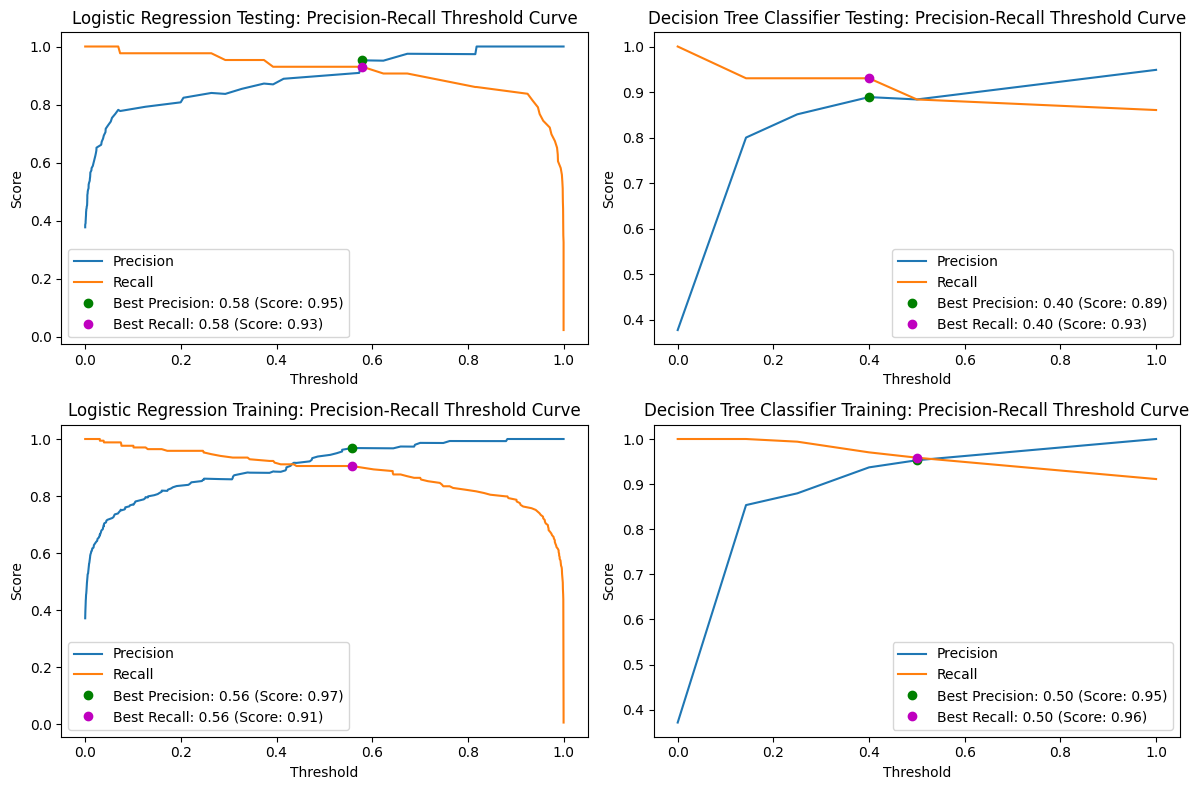

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve

def find_best_threshold(precision, recall, thresholds):
    f1_scores = 2 * (precision * recall) / (precision + recall)
    best_index = np.argmax(f1_scores)
    best_threshold = thresholds[best_index]
    return best_threshold

def plot_precision_recall_threshold(model, X, y, model_name, stage, subplot_index):
    # Compute precision, recall, and thresholds
    y_scores = model.predict_proba(X)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y, y_scores)

    # Create subplots
    plt.subplot(2, 2, subplot_index)

    # Plot precision-recall curve
    plt.plot(thresholds, precision[:-1], label='Precision')
    plt.plot(thresholds, recall[:-1], label='Recall')

    # Find the threshold that maximizes F1-score for precision
    best_precision_threshold = find_best_threshold(precision[:-1], recall[:-1], thresholds)
    best_precision_score = precision[np.abs(thresholds - best_precision_threshold).argmin()]
    plt.plot(best_precision_threshold, best_precision_score,
             'go', label=f'Best Precision: {best_precision_threshold:.2f} (Score: {best_precision_score:.2f})')

    # Find the threshold that maximizes F1-score for recall
    best_recall_threshold = find_best_threshold(recall[:-1], precision[:-1], thresholds)
    best_recall_score = recall[np.abs(thresholds - best_recall_threshold).argmin()]
    plt.plot(best_recall_threshold, best_recall_score,
             'mo', label=f'Best Recall: {best_recall_threshold:.2f} (Score: {best_recall_score:.2f})')

    # Set plot properties
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title(f'{model_name} {stage}: Precision-Recall Threshold Curve')
    plt.legend()

# Set up the subplots
fig = plt.figure(figsize=(12, 8))

# Plot precision-recall curves for different models and stages
plot_precision_recall_threshold(logreg, X_test, y_test, "Logistic Regression", "Testing", 1)
plot_precision_recall_threshold(logreg, X_train, y_train, "Logistic Regression", "Training", 3)
plot_precision_recall_threshold(dctree, X_test, y_test, "Decision Tree Classifier", "Testing", 2)
plot_precision_recall_threshold(dctree, X_train, y_train, "Decision Tree Classifier", "Training", 4)

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()


### Starting off with some definitions:
- The "best recall threshold" refers to the decision boundary or cutoff point that maximizes the recall score. It represents the threshold value at which the model achieves the highest recall rate while classifying instances as positive or negative.

- On the other hand, the "best recall score" is the actual numerical value of the recall achieved by the model at the best recall threshold. It quantifies the proportion of true positive predictions out of all actual positive instances.

- The "best precision threshold" refers to the threshold value that maximizes the precision of the model. It is the threshold that achieves the highest precision while making predictions.

- The "best precision score" is the actual precision achieved by the model when using the best precision threshold. It represents the accuracy of the model's positive predictions compared to the actual positive instances.

### Now, about those plots:
#### Regarding Logistic Regression on the Test sets:
- **Precision**: The precision starts at around 0.38 and gradually increases to 1.0 as the threshold increases. This means that when the threshold is set higher, the model becomes more conservative in making positive predictions, resulting in fewer false positives. Consequently, the precision improves, indicating that a higher proportion of the positive predictions made by the model are correct. The best precision score achieved by the model is 0.95, which suggests that when the best precision threshold of 0.58 is used, the model has a high accuracy in predicting positive instances.

- **Recall**: The recall starts at 1.0 and drops to about 0.05 as the threshold increases. This indicates that as the threshold becomes higher, the model becomes more stringent in classifying instances as positive, resulting in a larger number of false negatives. The model achieves perfect recall (1.0) initially, indicating that it correctly identifies all positive instances. However, as the threshold increases, the recall drops significantly. The best recall score achieved by the model is 0.93, which implies that when the best recall threshold of 0.58 is used, the model captures a high proportion of the actual positive instances.

- **Threshold Range**: The threshold determines the confidence level at which the model classifies an instance as positive or negative. Choosing a threshold closer to 0.99 would result in more conservative predictions, where the model is very confident in its positive predictions. This would generally lead to higher precision but lower recall. In other words, the model would make fewer positive predictions overall, but a larger proportion of those predictions would be correct.

#### Logistic Regression on Test:
- **Precision**: The precision initially starts at around 0.38 and gradually increases to 1.0 as the threshold increases. This suggests that when the threshold for making predictions is set higher, the model becomes more conservative in classifying instances as positive. Consequently, the precision improves, indicating that a higher proportion of the positive predictions made by the model are correct. The varying precision values suggest that the model's performance can be influenced by the chosen threshold.

- **Recall**: The recall starts at 1.0 and drops to about 0.05 as the threshold increases. This means that as the threshold becomes higher, the model becomes more stringent in classifying instances as positive. As a result, the model starts missing a larger number of actual positive instances, leading to a decrease in recall. Despite the drop in recall, the model achieves perfect recall initially, indicating that it correctly identifies all positive instances.

- **Threshold Range**: The threshold values used for making predictions range from very small values (e.g., 5.88e-05) to larger values (e.g., 0.99). This wide range allows the model to make predictions with varying levels of confidence. Choosing a threshold closer to 0.99 would result in more conservative predictions with higher precision but lower recall, while selecting a threshold closer to 5.88e-05 would lead to more lenient predictions with higher recall but lower precision.


#### Decision Tree Classifier on Test:
- **Precision**: The precision initially starts at 0.38 and reaches a maximum value of 0.95 as the threshold changes. Precision represents the proportion of correctly predicted positive instances out of all instances predicted as positive. A higher precision indicates that a larger proportion of the positive predictions made by the model are correct. In this case, the model achieves relatively high precision, with a maximum value of 0.95.

- **Recall**: The recall starts at 1.0 and gradually decreases to 0.86 as the threshold changes. Recall represents the proportion of actual positive instances that are correctly identified by the model. A higher recall indicates that the model can identify a larger proportion of the actual positive instances. Although the model achieves a perfect recall initially, the recall gradually decreases as the threshold increases. A recall of 0.86 suggests that the model is still able to capture a relatively high proportion of the positive instances but may miss some.

- **Threshold Range**: The threshold values used range from 0.0 to 1.0, indicating the range of probabilities or scores at which the model classifies instances as positive or negative. Different threshold values determine the trade-off between precision and recall. A lower threshold would result in more instances being classified as positive, potentially increasing recall but decreasing precision. Conversely, a higher threshold would make the model more conservative in classifying instances as positive, potentially increasing precision but decreasing recall.

- **Model Comparison**: The information states that the model achieves a slightly lower recall compared to logistic regression on the test data. This suggests that the model may have a slightly reduced ability to identify positive instances correctly compared to logistic regression.

#### Logistic Regression on Train:
- **Precision**: The precision starts at around 0.37 and gradually increases to 1.0 as the threshold increases. Precision represents the proportion of correctly predicted positive instances out of all instances predicted as positive. A higher precision indicates that a larger proportion of the positive predictions made by the model are correct. In this case, the precision improves as the threshold increases, eventually reaching a maximum value of 1.0. This means that when the model predicts an instance as positive, it is highly confident and accurate.

- **Recall**: The recall remains constant at 1.0 throughout, indicating that the model identifies all positive instances correctly. Recall represents the proportion of actual positive instances that are correctly identified by the model. A recall of 1.0 means that the model is able to capture all positive instances without any false negatives. This is a desirable characteristic as it shows that the model is highly sensitive to positive instances and does not miss any of them.

- **Threshold Range**: The threshold values used range from very small values (e.g., 4.47e-05) to larger values (e.g., 0.99). These threshold values determine the trade-off between precision and recall. As the threshold increases, the model becomes more conservative in classifying instances as positive, leading to higher precision but potentially lower recall.

- **Model Comparison**: The information states that, similar to logistic regression on the test data, the model achieves perfect recall, indicating that it identifies all positive instances correctly. However, the precision varies significantly. This suggests that the model is highly effective in capturing positive instances (achieving perfect recall), but the precision is more sensitive to the threshold and varies across different threshold values.

### Insights
So far it's still inconclusive as they have really similar performances and the differences that are there are actually not that big. Let's move on to some AUC curves for even *further* insight.

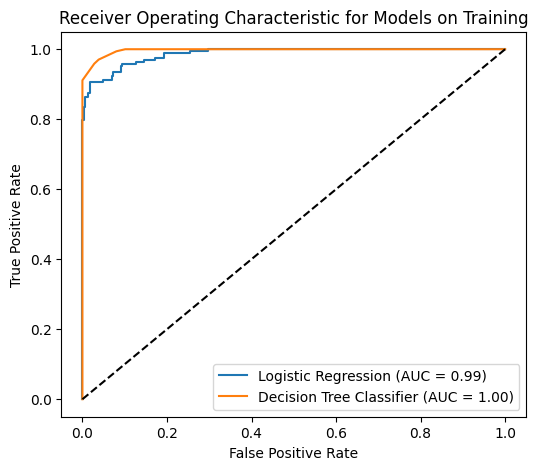

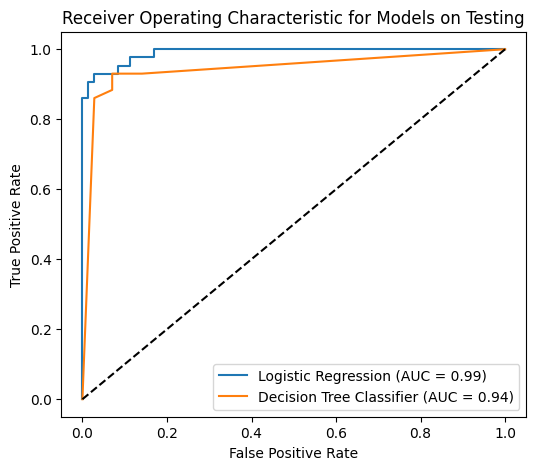

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc(models, model_names, X, y, datatype):
    plt.figure(figsize=(6, 5))

    for model, name in zip(models, model_names):
        # Compute predicted probabilities and fpr, tpr values
        y_scores = model.predict_proba(X)[:, 1]
        fpr, tpr, thresholds = roc_curve(y, y_scores)

        # Compute AUC
        auc = roc_auc_score(y, y_scores)

        # Plot ROC curve
        plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(name, auc))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for Models on {datatype}')
    plt.legend(loc='lower right')

    # Show the plot
    plt.show()

models = [logreg, dctree]
model_names = ['Logistic Regression', 'Decision Tree Classifier']

# Plot ROC curves for training and test data
plot_roc(models, model_names, X_train, y_train, "Training")
plot_roc(models, model_names, X_test, y_test, "Testing")

### Insights
Looking at the two ROC plots, we can determine that while the decision tree classifier (DTC) has a better true positive/false positive ratio (it is further in the top-right, earlier) on the training dataset, it fails to replicate that feat in the testing dataset. This leads me to believe that it is overfitting. This belief is enforced by the fact that the training data DTC has an AUC of 1, as well as all the previous data we gathered. The logistic regression model on the other hand, while having a poorer training performance, does much better on the testing dataset, indicating that it was overfitting less than the DTC. This is also evidenced by the fact that it has the same AUC too, of 0.99 (which is almost perfect). 

Overall, the usage of these ROC plots has shown that **the logistic regression model is better** in the context of this clincal setting. This is because it has similar levels of recall and precision, and has a true positive/false positive rate ratio than a DTC, while not overfitting.

### Task 1.2: Feature Importance Discussion
Describe the features that have a higher chance of impacting the prediction of the tumour status according to each of the two models. Discuss their similarities/differences.

Since the better model is logistic regression, let's take a look at the features it uses sorted in descending order of importance. We will sort them by the coefficients/weights the logistic regression model assigned to it, which represent the strength and direction of the relationship between the feature and target variable.

In [114]:
clean_df.iloc[:,:-1].columns.tolist()

['texture_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [126]:
import numpy as np

def get_top_features_logreg(model, feature_names, top_n):
    # Get the absolute coefficients of the model
    coef = np.abs(model.coef_[0])

    # Sort the coefficients and feature names in descending order
    sorted_indices = np.argsort(coef)[::-1]
    sorted_coef = coef[sorted_indices]
    sorted_features = np.array(feature_names)[sorted_indices]

    # Get the top N important features
    top_features = sorted_features[:top_n]
    top_coef = sorted_coef[:top_n]

    return top_features, top_coef

# Example usage:
feature_names = clean_df.iloc[:,:-1].columns.tolist()
top_features, top_coef = get_top_features_logreg(logreg, feature_names, top_n=7)

print("Top Features:")
for feature, coef in zip(top_features, top_coef):
    print(f"{feature}: {coef}")

Top Features:
concave points_mean: 3.5960662334973943
area_mean: 3.488735231054414
texture_mean: 1.54348640818001
compactness_mean: 1.162782871556465
smoothness_mean: 0.7040869577882719
symmetry_mean: 0.5613618032738417
fractal_dimension_mean: 0.30771672595635247


In [127]:
import numpy as np

def get_top_features(dt_classifier, feature_names, top_k=5):
    # Get feature importances from the decision tree classifier
    importances = dt_classifier.feature_importances_

    # Sort the importances in descending order
    indices = np.argsort(importances)[::-1]

    # Get the top k features and their importances
    top_features = np.array(feature_names)[indices[:top_k]]
    top_importances = importances[indices[:top_k]]

    return top_features, top_importances


top_features, top_importances = get_top_features(dctree, feature_names, top_k=7)

# Print the top features and their importances
print("Top Features:")
for feature, coef in zip(top_features, top_importances):
    print(f"{feature}: {coef}")

Top Features:
concave points_mean: 0.8159242965795599
area_mean: 0.08171285039377173
texture_mean: 0.07913439080967331
symmetry_mean: 0.014113496030579247
compactness_mean: 0.009114966186415751
fractal_dimension_mean: 0.0
smoothness_mean: 0.0


### What do these importances tell us?
#### For the logreg model:

- **concave points_mean**: This feature has the highest importance value of 3.596, indicating that it plays a significant role in predicting the target variable. A higher value of concave points_mean is associated with a higher likelihood of the sample being classified as malignant.

- **area_mean**: With an importance value of 3.489, area_mean is another important feature in the logreg model. A larger area_mean suggests a higher probability of the sample being classified as malignant.

- **texture_mean**: This feature has an importance value of 1.543. While not as influential as the top two features, texture_mean still contributes to the model's predictive power.

- **compactness_mean, smoothness_mean, symmetry_mean, and fractal_dimension_mean**: These features have lower importance values compared to the top three features. They still provide some information to the model but have a relatively smaller impact on the classification decision.

#### Now let's consider the DCT model:

- **concave points_mean**: Similar to the logreg model, concave points_mean is the most important feature in the DCT model as well. However, its importance value is lower at 0.816 compared to the logreg model.

- **area_mean and texture_mean**: These features also appear in the top features of the DCT model, but their importance values are relatively lower (0.082 and 0.079, respectively) compared to the logreg model.

- **symmetry_mean and compactness_mean**: These features have relatively lower importance values in the DCT model (0.014 and 0.009, respectively).

- **fractal_dimension_mean and smoothness_mean**: In the DCT model, both fractal_dimension_mean and smoothness_mean have importance values of 0.0, indicating that they have minimal impact on the model's predictions.

### Task 1.3: PCA Analysis
Using PCA, present the scatter plot of the data on the first two principal components. Add to your scatter plot different colours to represent the two classes in the data. What proportion of data variance is explained using the first two principal components?

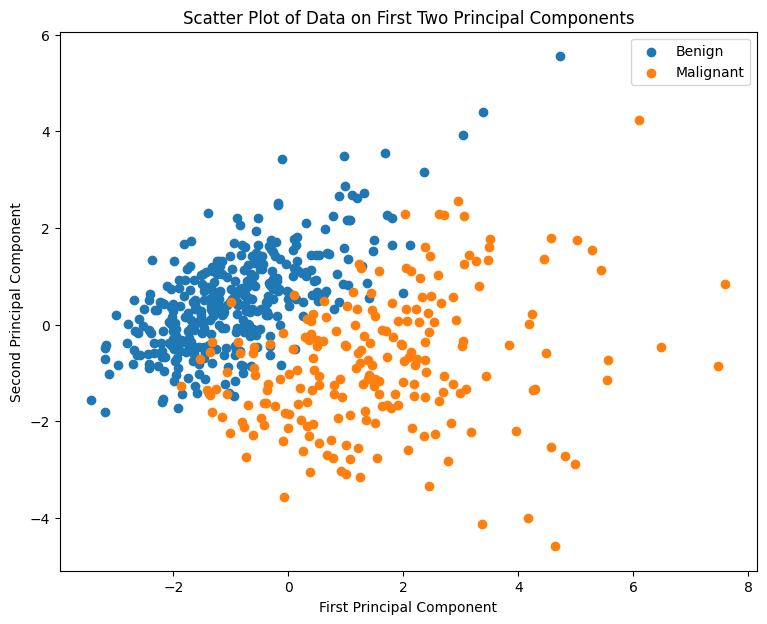

Variance ratio: [0.49445512 0.25150076]
Proportion explained: 0.7459558824042323


In [145]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  # Set the number of components to 2
principal_components = pca.fit_transform(X_scaled)
plt.figure(figsize=(9,7))

# Assuming your class labels are stored in y and you have two classes (0 and 1)
unique_classes = np.unique(y)
class_labels = ['Benign', 'Malignant']  # Replace with appropriate labels for your classes

# Plot the scatter plot for each class separately
for class_label, class_value in zip(class_labels, unique_classes):
    class_indices = np.where(y == class_value)
    plt.scatter(principal_components[class_indices, 0], principal_components[class_indices, 1],
                label=class_label)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Scatter Plot of Data on First Two Principal Components')
plt.legend()
plt.show()

variance_ratio = pca.explained_variance_ratio_
proportion_explained = np.sum(variance_ratio[:2])  # Sum the first two values

print(f"Variance ratio: {variance_ratio}")
print(f"Proportion explained: {proportion_explained}")

#### Some context:
PCA (Principal Component Analysis) is a dimensionality reduction technique commonly used in data analysis and machine learning. It aims to transform a high-dimensional dataset into a lower-dimensional space while preserving the most important patterns and structures in the data.

The main goal of PCA is to identify the directions, known as principal components, along which the data varies the most. These principal components are orthogonal to each other and are ranked in order of the amount of variance they explain in the original data. The first principal component explains the largest amount of variance, followed by the second component, and so on.

#### What is the Variance Ratio? What's the proportion explained?

The variance ratio [0.49445512 0.25150076] indicates the proportion of variance explained by each of the first two principal components.

In this case, the first principal component explains approximately 49.45% of the variance in the data, while the second principal component explains around 25.15% of the variance.

To calculate the proportion of data variance explained by the first two principal components, we can sum up their variance ratios. In this case, the proportion explained is approximately 0.7459, or 74.59%.

This means that by considering only the first two principal components, we can capture and explain about 74.59% of the total variance in the original dataset. It indicates that these two components contain a significant amount of information about the data and can effectively represent the patterns and structures present in the dataset. However, it's important to note that around 25.40% of the variance is not explained by these two components.

### Task 1.4: Biplot of Variable Vectors with PCA Components
Considering the first two principal components from Task 3, present the biplot with the variables vectors and the observed data projected on the first two principal components (with the colours for the two categories). Give your interpretation of the results.

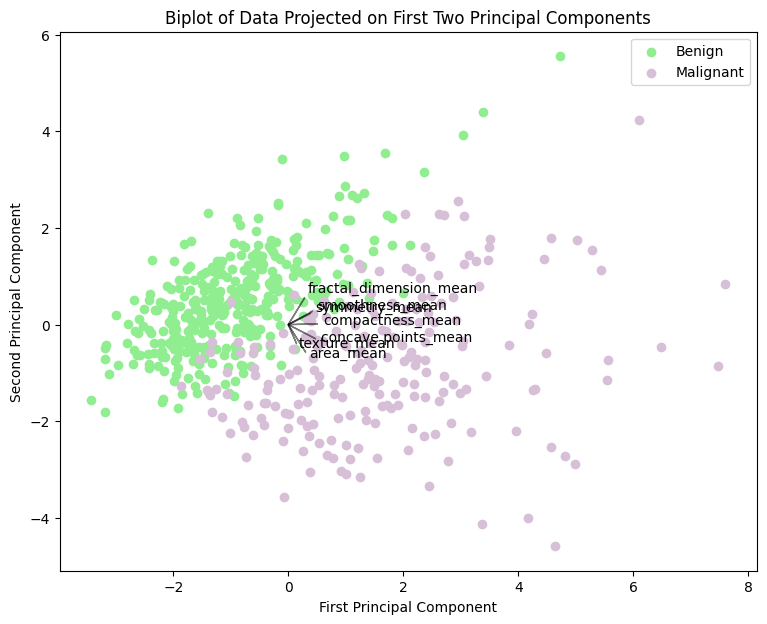

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  # Set the number of components to 2
principal_components = pca.fit_transform(X_scaled)
plt.figure(figsize=(9, 7))

# Assuming your class labels are stored in y and you have two classes (0 and 1)
unique_classes = np.unique(y)
class_labels = ['Benign', 'Malignant']  # Replace with appropriate labels for your classes

# Define class colors
class_colors = ['#90EE90', '#D8BFD8']

# Plot the scatter plot for each class separately
for class_label, class_value, class_color in zip(class_labels, unique_classes, class_colors):
    class_indices = np.where(y == class_value)
    plt.scatter(principal_components[class_indices, 0], principal_components[class_indices, 1],
                label=class_label, color=class_color)

# Plot the variable vectors
for i, variable in enumerate(clean_df.iloc[:, :-1]):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='black', alpha=0.5)
    plt.text(pca.components_[0, i] * 1.2, pca.components_[1, i] * 1.2, variable, color='black')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Biplot of Data Projected on First Two Principal Components')
plt.legend()
plt.show()


### Task 1.5: Variable Relevance to Tumor Status
Using the plot of Task 4, which variables are more related to the tumour status? Justify your answer. Compare the results obtained with the results obtained in Task 2. However I will cheat a bit and also plot the feature relatedness.

In [161]:
feature_relatedness = np.abs(pca.components_.T[:, :2])

# Sort the features based on their relatedness (descending order)
sorted_indices = np.argsort(-np.sum(feature_relatedness, axis=1))
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_feature_relatedness = feature_relatedness[sorted_indices]

# Print the sorted feature relatedness with feature names
print("Sorted Feature Relatedness:")
for feature, relatedness in zip(sorted_feature_names, sorted_feature_relatedness):
    print(f"{feature}: {relatedness}")

Sorted Feature Relatedness:
area_mean: [0.30156563 0.57079445]
fractal_dimension_mean: [0.28439784 0.55335553]
concave points_mean: [0.47530204 0.29353033]
smoothness_mean: [0.4182963  0.27261562]
symmetry_mean: [0.38649283 0.2312476 ]
texture_mean: [0.14321457 0.39222972]
compactness_mean: [0.50735105 0.01387166]


Based on the feature relatedness obtained from PCA and the feature importance from logistic regression, we can make the following observations:

PCA Relatedness to Classes:
- The top features based on PCA relatedness to the classes are:
  1. `area_mean`: The `area_mean` feature has a high positive relatedness with the first principal component and a slightly lower positive relatedness with the second principal component. This suggests that `area_mean` contributes significantly to the overall variation captured by the principal components and is related to the classes.
  2. `fractal_dimension_mean`: The `fractal_dimension_mean` feature has relatively high positive relatedness with both the first and second principal components. This indicates that it plays a role in differentiating the classes based on the variation captured by the principal components.
  3. `concave points_mean`: The `concave points_mean` feature has a high positive relatedness with the first principal component and a lower positive relatedness with the second principal component. This suggests that it contributes significantly to the primary source of variation represented by the first principal component and is associated with the classes.
  4. `smoothness_mean`, `symmetry_mean`, `texture_mean`, and `compactness_mean`: These features have moderate positive relatedness values with both principal components, indicating their contribution to the overall variation and class separation captured by the principal components.

Logistic Regression Importance of Features:
- The top features based on logistic regression importance are:
  1. `concave points_mean`: The logistic regression identifies `concave points_mean` as the most important feature for distinguishing between the classes.
  2. `area_mean`: The `area_mean` feature is also considered important, but its importance is lower compared to `concave points_mean`.
  3. `texture_mean` and `symmetry_mean`: These features are identified as moderately important by logistic regression.
  4. `compactness_mean`, `fractal_dimension_mean`, and `smoothness_mean`: These features are assigned lower importance by logistic regression.

Justification and Comparison:
- The agreement between the top features identified by PCA and logistic regression is notable, although there are some differences in the ranking. Both approaches highlight the importance of `concave points_mean` and `area_mean` for distinguishing between the classes. These features seem to have a strong relationship with the classes based on both methods.
- It's important to note that PCA focuses on capturing the overall variation in the data, while logistic regression specifically considers the predictive power of the features for the target variable. Therefore, the differences in the feature importance rankings can be attributed to the different objectives and methodologies of PCA and logistic regression.
- In Task 2, the logistic regression identified `concave points_mean` as the most important feature, which aligns with the findings from PCA. However, the importance of `area_mean` is relatively higher in logistic regression compared to PCA. This difference could be due to the specific modeling assumptions and regularization effects in logistic regression.
- Overall, the consistency between PCA and logistic regression results suggests that `concave points_mean` and `area_mean` are strong indicators of the tumor status, as they contribute significantly to both the overall variation captured by PCA and the predictive power of the logistic regression model. The other features identified by both methods also play a role in distinguishing between the classes but to a lesser extent.

It's important to consider that these interpretations are based on the provided results and may vary depending on the specific dataset and analysis context.